### Описание проекта

Подготовить модель машинного обучения, осуществляющую прогнозирование температуры стали.

In [1]:
import pandas as pd
from IPython.display import display
from datetime import datetime
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

In [2]:
dataset_path = 'final_steel/'

#### Загрузка данных

In [3]:
# Загрузим данные
data_arc = pd.read_csv(dataset_path + 'data_arc.csv')
data_bulk = pd.read_csv(dataset_path + 'data_bulk.csv')
data_bulk_time = pd.read_csv(dataset_path + 'data_bulk_time.csv')
data_gas = pd.read_csv(dataset_path + 'data_gas.csv')
data_temp = pd.read_csv(dataset_path + 'data_temp.csv')
data_wire = pd.read_csv(dataset_path + 'data_wire.csv')
data_wire_time = pd.read_csv(dataset_path + 'data_wire_time.csv')

In [4]:
def Data_check(data):
    print('Начало таблицы')
    display(data.head())
    print()
    print('Конец таблицы')
    display(data.tail())
    print()
    data.info()   

In [5]:
Data_check(data_arc)

Начало таблицы


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397



Конец таблицы


,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768
14875,3241,2019-09-01 04:34:47,2019-09-01 04:36:08,0.306580,0.196708



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
key                     14876 non-null int64
Начало нагрева дугой    14876 non-null object
Конец нагрева дугой     14876 non-null object
Активная мощность       14876 non-null float64
Реактивная мощность     14876 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [6]:
Data_check(data_bulk)

Начало таблицы


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0



Конец таблицы


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,52.0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null float64
Bulk 2     22 non-null float64
Bulk 3     1298 non-null float64
Bulk 4     1014 non-null float64
Bulk 5     77 non-null float64
Bulk 6     576 non-null float64
Bulk 7     25 non-null float64
Bulk 8     1 non-null float64
Bulk 9     19 non-null float64
Bulk 10    176 non-null float64
Bulk 11    177 non-null float64
Bulk 12    2450 non-null float64
Bulk 13    18 non-null float64
Bulk 14    2806 non-null float64
Bulk 15    2248 non-null float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [7]:
Data_check(data_bulk_time)

Начало таблицы


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56



Конец таблицы


,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
3124,3237,NaN,NaN,2019-08-31 22:51:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 22:46:52,NaN,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaN,NaN,2019-08-31 23:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 23:33:09,NaN,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27
3128,3241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 04:05:34,2019-09-01 04:05:34



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
key        3129 non-null int64
Bulk 1     252 non-null object
Bulk 2     22 non-null object
Bulk 3     1298 non-null object
Bulk 4     1014 non-null object
Bulk 5     77 non-null object
Bulk 6     576 non-null object
Bulk 7     25 non-null object
Bulk 8     1 non-null object
Bulk 9     19 non-null object
Bulk 10    176 non-null object
Bulk 11    177 non-null object
Bulk 12    2450 non-null object
Bulk 13    18 non-null object
Bulk 14    2806 non-null object
Bulk 15    2248 non-null object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [8]:
Data_check(data_gas)

Начало таблицы


,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692



Конец таблицы


,key,Газ 1
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103
3238,3241,12.680959



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
key      3239 non-null int64
Газ 1    3239 non-null float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [9]:
Data_check(data_temp)

Начало таблицы


,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0



Конец таблицы


,key,Время замера,Температура
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN
15906,3241,2019-09-01 04:38:08,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
key             15907 non-null int64
Время замера    15907 non-null object
Температура     13006 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [10]:
Data_check(data_wire)

Начало таблицы


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Конец таблицы


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,63.117595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null float64
Wire 2    1079 non-null float64
Wire 3    63 non-null float64
Wire 4    14 non-null float64
Wire 5    1 non-null float64
Wire 6    73 non-null float64
Wire 7    11 non-null float64
Wire 8    19 non-null float64
Wire 9    29 non-null float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [11]:
Data_check(data_wire_time)

Начало таблицы


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Конец таблицы


,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3080,3241,2019-09-01 04:16:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
key       3081 non-null int64
Wire 1    3055 non-null object
Wire 2    1079 non-null object
Wire 3    63 non-null object
Wire 4    14 non-null object
Wire 5    1 non-null object
Wire 6    73 non-null object
Wire 7    11 non-null object
Wire 8    19 non-null object
Wire 9    29 non-null object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


##### Изучение данных показало огромное количество пропусков в таблицах. Требуется предобработка данных.

In [12]:
# Приведем в нужный формат, а также названия столбцов на англ и в нижнем регистре
data_arc_filter = data_arc.copy()
data_arc_filter.columns = ['key', 'arc heating start', 'arc heating finish', 'active power', 'reactive power'] 

data_arc_filter['arc heating start'] = pd.to_datetime(data_arc_filter['arc heating start'], format = '%Y-%m-%d %H:%M:%S')
data_arc_filter['arc heating finish'] = pd.to_datetime(data_arc_filter['arc heating finish'], format = '%Y-%m-%d %H:%M:%S')



In [13]:
# Удалим значения мощности меньше нуля

error_power_rows = []

for row in data_arc_filter.index:
    if(data_arc_filter['active power'][row] <= 0 or data_arc_filter['reactive power'][row] <= 0):
        error_power_rows.append(row)

data_arc_filter = data_arc_filter.drop(axis = 0, index = error_power_rows)

In [14]:
#Обработаем признаки мощностей
keys = data_arc_filter['key'].unique()
a_power_start = []
power_sum = []
r_power_start = []
r_power_sum = []
#Для каждой партии
for key in keys:
    tmp = data_arc_filter[data_arc_filter['key'] == key]
    tmp_sort = tmp.sort_values(by = 'arc heating start').reset_index(drop = True) #Отсортируем от первого времени и сбросим индексы, чтобы проще брать
    a_power_start.append(tmp_sort['active power'][0]) #Сформируем значения активной мощности в первый момент времени
    power_sum.append(tmp_sort['active power'].sum() + tmp_sort['reactive power'].sum()) #Сформируем суммарное значение мощности
    r_power_start.append(tmp_sort['reactive power'][0]) #Сформируем значение реактивной мощности в первый момент времени
    #r_power_sum.append(tmp_sort['reactive power'].sum())

In [15]:
data_arc_filter_final = pd.DataFrame({'key': keys, 'a_power_start': a_power_start, 'power_sum': power_sum,
                                      'r_power_start': r_power_start})

In [16]:
data_arc_filter_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 4 columns):
key              3214 non-null int64
a_power_start    3214 non-null float64
power_sum        3214 non-null float64
r_power_start    3214 non-null float64
dtypes: float64(3), int64(1)
memory usage: 100.6 KB


In [17]:
data_arc_filter_final.head()

,key,a_power_start,power_sum,r_power_start
0,1,0.976059,8.061388,0.687084
1,2,0.438063,5.050710,0.283043
2,3,1.062053,4.124958,0.671494
3,4,0.875313,5.269548,0.614404
4,5,0.950026,5.599815,0.690523


In [18]:
data_bulk_time['Bulk 12'] = pd.to_datetime(data_bulk_time['Bulk 12'], format = '%Y-%m-%d %H:%M:%S')
data_bulk_time['Bulk 14'] = pd.to_datetime(data_bulk_time['Bulk 14'], format = '%Y-%m-%d %H:%M:%S')
data_bulk_time['Bulk 15'] = pd.to_datetime(data_bulk_time['Bulk 15'], format = '%Y-%m-%d %H:%M:%S')

data_bulk_columns = ['key', 'Bulk 12', 'Bulk 14', 'Bulk 15']
data_bulk_filter = data_bulk[data_bulk_columns]
data_bulk_time_filter = data_bulk_time[data_bulk_columns]

data_bulk_new_columns = [x.lower() for x in data_bulk_columns]

data_bulk_filter.columns = data_bulk_new_columns
data_bulk_time_filter.columns = data_bulk_new_columns
data_bulk_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 4 columns):
key        3129 non-null int64
bulk 12    2450 non-null float64
bulk 14    2806 non-null float64
bulk 15    2248 non-null float64
dtypes: float64(3), int64(1)
memory usage: 97.9 KB


In [19]:
data_bulk_time_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 4 columns):
key        3129 non-null int64
bulk 12    2450 non-null datetime64[ns]
bulk 14    2806 non-null datetime64[ns]
bulk 15    2248 non-null datetime64[ns]
dtypes: datetime64[ns](3), int64(1)
memory usage: 97.9 KB


In [20]:
data_bulk_filter = data_bulk_filter.merge(data_bulk_time_filter, on = 'key', suffixes = ('', '_time'))

In [21]:
data_bulk_filter_gb_b12 = data_bulk_filter.groupby(by = 'bulk 12').mean()
data_bulk_filter_gb_b14 = data_bulk_filter.groupby(by = 'bulk 14').mean()
data_bulk_filter_gb_b15 = data_bulk_filter.groupby(by = 'bulk 15').mean()

#### Заполнение части пропусков

In [22]:
for row in data_bulk_filter.index:
    #change bulk 14 on bulk 12
    if((np.isnan(data_bulk_filter['bulk 12'][row]) == False) and (np.isnan(data_bulk_filter['bulk 14'][row]) == True)):
        data_bulk_filter['bulk 14'][row] = data_bulk_filter_gb_b12['bulk 14'][data_bulk_filter['bulk 12'][row]]
    #change bulk 15 on bulk 12
    if((np.isnan(data_bulk_filter['bulk 12'][row]) == False) and (np.isnan(data_bulk_filter['bulk 15'][row]) == True)):
        data_bulk_filter['bulk 15'][row] = data_bulk_filter_gb_b12['bulk 15'][data_bulk_filter['bulk 12'][row]]
    #change bulk 12 on bulk 14
    if((np.isnan(data_bulk_filter['bulk 14'][row]) == False) and (np.isnan(data_bulk_filter['bulk 12'][row]) == True)):
        data_bulk_filter['bulk 12'][row] = data_bulk_filter_gb_b14['bulk 12'][data_bulk_filter['bulk 14'][row]]
    #change bulk 15 on bulk 14
    if((np.isnan(data_bulk_filter['bulk 14'][row]) == False) and (np.isnan(data_bulk_filter['bulk 15'][row]) == True)):
        data_bulk_filter['bulk 15'][row] = data_bulk_filter_gb_b14['bulk 15'][data_bulk_filter['bulk 14'][row]]
    #change bulk 12 on bulk 15
    if((np.isnan(data_bulk_filter['bulk 15'][row]) == False) and (np.isnan(data_bulk_filter['bulk 12'][row]) == True)):
        data_bulk_filter['bulk 12'][row] = data_bulk_filter_gb_b15['bulk 12'][data_bulk_filter['bulk 15'][row]]
    #change bulk 14 on bulk 15
    if((np.isnan(data_bulk_filter['bulk 15'][row]) == False) and (np.isnan(data_bulk_filter['bulk 14'][row]) == True)):
        data_bulk_filter['bulk 14'][row] = data_bulk_filter_gb_b15['bulk 14'][data_bulk_filter['bulk 15'][row]]
    

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: Set

In [23]:
del data_bulk_filter_gb_b12
del data_bulk_filter_gb_b14
del data_bulk_filter_gb_b15

In [24]:
data_bulk_filter = data_bulk_filter[['key', 'bulk 12', 'bulk 14', 'bulk 15']]
data_bulk_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3129 entries, 0 to 3128
Data columns (total 4 columns):
key        3129 non-null int64
bulk 12    2833 non-null float64
bulk 14    2839 non-null float64
bulk 15    2826 non-null float64
dtypes: float64(3), int64(1)
memory usage: 202.2 KB


In [25]:
data_bulk_filter

,key,bulk 12,bulk 14,bulk 15
0,1,206.000000,150.0,154.0
1,2,206.000000,149.0,154.0
2,3,205.000000,152.0,153.0
3,4,207.000000,153.0,154.0
4,5,203.000000,151.0,152.0
...,...,...,...,...
3124,3237,252.000000,130.0,206.0
3125,3238,254.000000,108.0,106.0
3126,3239,158.000000,270.0,88.0
3127,3240,300.888889,192.0,54.0


In [26]:
data_wire_columns = ['key', 'wire 1']
data_wire_filter = data_wire[['key', 'Wire 1']]
data_wire_filter.columns = data_wire_columns
data_wire_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 2 columns):
key       3081 non-null int64
wire 1    3055 non-null float64
dtypes: float64(1), int64(1)
memory usage: 48.3 KB


In [27]:
data_gas.columns = ['key', 'gaz']
data_temp.columns = ['key', 'temp_time', 'temp']
data_temp['temp_time'] = pd.to_datetime(data_temp['temp_time'], format = '%Y-%m-%d %H:%M:%S')

In [28]:
#До того, как прибавлять температуру, проверим температуру на наличие значений измерений в последний момент времени
# Для этого вытащим из датасета все значения партий
keys = data_temp['key'].unique()
list_ = []
list_key = []
list_temp = []
list_temp_target = []

for key in keys:
    tmp = data_temp[data_temp['key'] == key]
    tmp_sort = tmp.sort_values(by = 'temp_time').reset_index(drop = True)
    if(np.isnan(tmp_sort.iloc[-1]['temp']) == False):
        list_key.append(key)
        list_temp.append(tmp_sort.iloc[0]['temp']) # Первая измеренная температура в качестве признака
        list_temp_target.append(tmp_sort.iloc[-1]['temp']) # Последняя в качестве целевого признака
    else:
        list_.append(key)
        
        


In [29]:
data_temp_final = pd.DataFrame({'key': list_key, 'temp': list_temp, 'temp_target': list_temp_target})

Проверим, что взяли правильные температуры и не ошибились

In [30]:
key = np.random.randint(low = 1, high = data_temp_final['key'].max())

In [31]:
data_temp[data_temp['key'] == key]

,key,temp_time,temp
7365,1498,2019-06-26 09:18:40,1561.0
7366,1498,2019-06-26 09:31:09,1589.0
7367,1498,2019-06-26 09:35:17,1596.0


In [32]:
data_temp_final[data_temp_final['key'] == key]

,key,temp,temp_target
1483,1498,1561.0,1596.0


In [33]:
data_temp_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 3 columns):
key            2477 non-null int64
temp           2477 non-null float64
temp_target    2477 non-null float64
dtypes: float64(2), int64(1)
memory usage: 58.2 KB


In [34]:
data_temp_final

,key,temp,temp_target
0,1,1571.0,1613.0
1,2,1581.0,1602.0
2,3,1596.0,1599.0
3,4,1601.0,1625.0
4,5,1576.0,1602.0
...,...,...,...
2472,2495,1570.0,1591.0
2473,2496,1554.0,1591.0
2474,2497,1571.0,1589.0
2475,2498,1591.0,1594.0


##### Данные предобработаны

#### Соединение таблиц

In [35]:
data_final = data_temp_final.merge(data_bulk_filter, on = 'key', how = 'left')
data_final = data_final.fillna(0)
data_final = data_final.merge(data_wire_filter, on = 'key', how = 'left')
data_final = data_final.dropna()
data_final = data_final.merge(data_gas, on = 'key', how = 'left')
data_final = data_final.dropna()
data_final = data_final.merge(data_arc_filter_final, on = 'key', how = 'left')
data_final = data_final.dropna()
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2346
Data columns (total 11 columns):
key              2346 non-null int64
temp             2346 non-null float64
temp_target      2346 non-null float64
bulk 12          2346 non-null float64
bulk 14          2346 non-null float64
bulk 15          2346 non-null float64
wire 1           2346 non-null float64
gaz              2346 non-null float64
a_power_start    2346 non-null float64
power_sum        2346 non-null float64
r_power_start    2346 non-null float64
dtypes: float64(10), int64(1)
memory usage: 219.9 KB


In [36]:
data_final.head()

,key,temp,temp_target,bulk 12,bulk 14,bulk 15,wire 1,gaz,a_power_start,power_sum,r_power_start
0,1,1571.0,1613.0,206.0,150.0,154.0,60.059998,29.749986,0.976059,8.061388,0.687084
1,2,1581.0,1602.0,206.0,149.0,154.0,96.052315,12.555561,0.438063,5.050710,0.283043
2,3,1596.0,1599.0,205.0,152.0,153.0,91.160157,28.554793,1.062053,4.124958,0.671494
3,4,1601.0,1625.0,207.0,153.0,154.0,89.063515,18.841219,0.875313,5.269548,0.614404
4,5,1576.0,1602.0,203.0,151.0,152.0,89.238236,5.413692,0.950026,5.599815,0.690523


### Исследовательский анализ

#### Поиск возможного высокого значения автокорреляции признаков, как вид их отбора

In [37]:
#Функция изменения значений над главной диагональю матрицы, чтобы не мешались при отборе признаков
def corr_diag_h(_df):
    _indx = _df.index
    _clmns = _df.columns
    for i in range(len(_indx)):
        for j in range(len(_clmns)):
            if j > i:
                _df[_clmns[j]][_indx[i]] = -2
    return _df

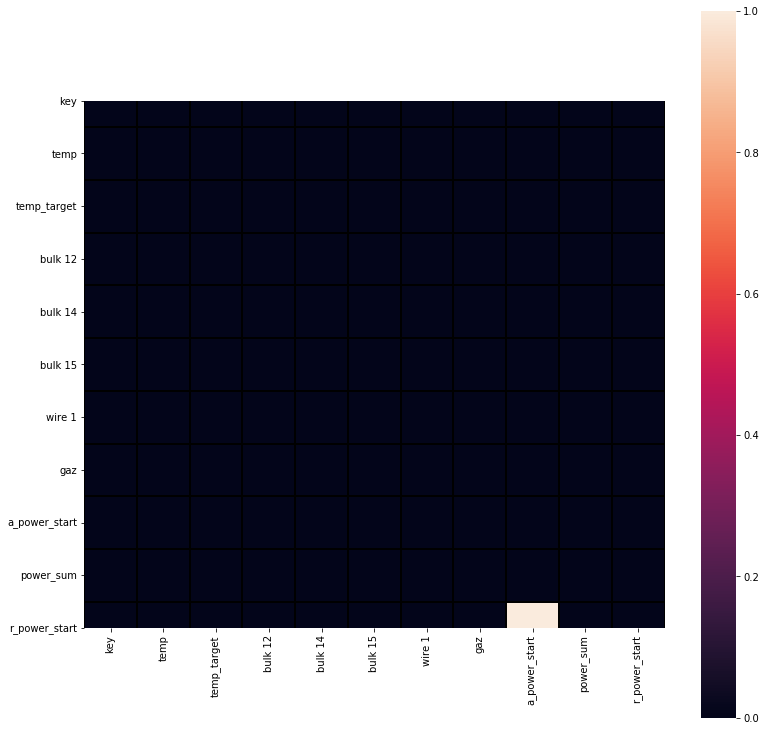

In [38]:
#Порог корреляции
CORR_THRESHOLD = 0.85

plt.subplots(figsize = (13, 13))

data_corr = data_final.corr()

np.fill_diagonal(data_corr.values, -2)

data_corr = corr_diag_h(data_corr)

sns.heatmap(data_corr > CORR_THRESHOLD, annot = False, fmt='.3g', linewidths=1,
            linecolor='black', square = True, annot_kws={'size':8})

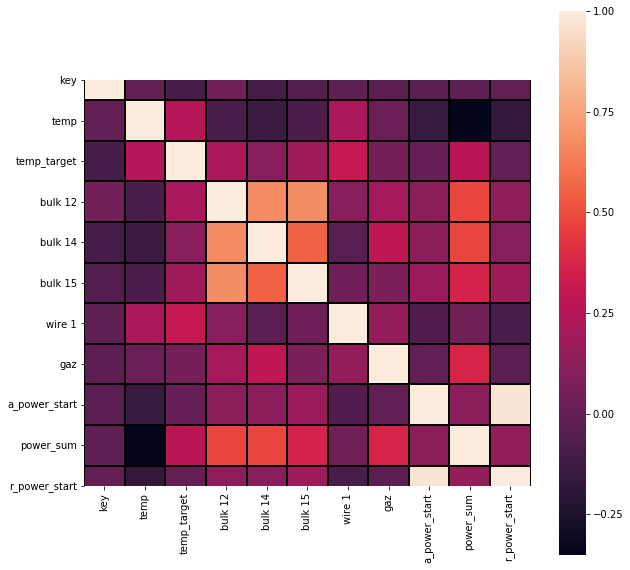

In [39]:
plt.figure(figsize = (10, 10))
sns.heatmap(data_final.corr(), annot = False, fmt='.3g', linewidths=1,
            linecolor='black', square = True, annot_kws={'size':8})

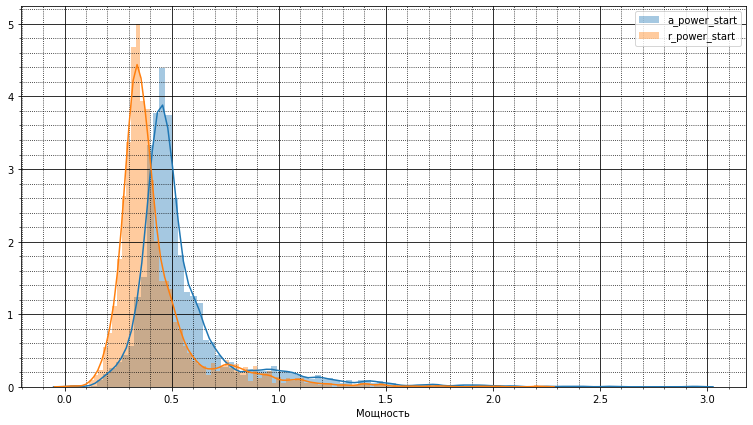

In [40]:
plt.figure(figsize = (13,7))

plt.minorticks_on()
plt.grid(which='major',
        color = 'k')
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
cols_tb = ['a_power_start', 'r_power_start']

for cols in cols_tb:
    sns.distplot(data_final[cols], kde=True, rug=False, label = cols, bins = 100,
                axlabel = 'Мощность')
    plt.legend()

In [41]:
data_final_no_reactive = data_final.drop('r_power_start', axis = 1)

### Вывод
##### Выявлена существенная корреляция, между значениями мощностей, что логично, ввиду того, что источник нагрева один. В связи с этим было принято не убирать ни один из этих параметров из числа признаков.

### Модель

In [42]:
random_state = 123

#### Разделение на выборки

In [43]:
# Поделим на выборки
data_features = data_final.drop('temp_target', axis = 1)
data_target = data_final['temp_target']

data_features_train, data_features_test, data_target_train, data_target_test = train_test_split(data_features, data_target, 
                                                                                                test_size = 0.2, random_state = random_state)

# Поделим на выборки второй датасет, без реативной мощности
data_features_no_reactive = data_final_no_reactive.drop('temp_target', axis = 1)
data_target_no_reactive = data_final_no_reactive['temp_target']

data_features_train_no_reactive, data_features_test_no_reactive, data_target_train_no_reactive, data_target_test_no_reactive = train_test_split(data_features_no_reactive, 
                                                                               data_target_no_reactive,
                                                                               test_size = 0.2, 
                                                                               random_state = random_state)

Проверка размеров выборок

In [44]:
display('Размеры выборок')
display('Обучающие')
display(data_features_train.shape, data_target_train.shape)
display('Тестовые')
display(data_features_test.shape, data_target_test.shape)

'Размеры выборок'

'Обучающие'

(1876, 10)

(1876,)

'Тестовые'

(470, 10)

(470,)

In [45]:
display('Размеры выборок')
display('Обучающие')
display(data_features_train_no_reactive.shape, data_target_train_no_reactive.shape)
display('Тестовые')
display(data_features_test_no_reactive.shape, data_target_test_no_reactive.shape)

'Размеры выборок'

'Обучающие'

(1876, 9)

(1876,)

'Тестовые'

(470, 9)

(470,)

##### Поиск оптимальных параметров модели градиентного бустинга методом перебора по сетке

##### Построение непосредственно модели

In [46]:
model = LGBMRegressor(n_estimators = 70, max_depth = 6, random_state = random_state)
model.fit(data_features_train, data_target_train)
predictions = model.predict(data_features_test)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


##### Посмотрим дополнительно на важность признаков

In [47]:
feature_importances = pd.DataFrame()
feature_importances['features'] = data_features_train.columns
feature_importances['importance'] = model.feature_importances_

print('Feature importances:')
display(feature_importances.sort_values(by = 'importance', ascending = False))

Feature importances:


,features,importance
8,power_sum,240
1,temp,233
0,key,191
5,wire 1,155
6,gaz,148
3,bulk 14,124
2,bulk 12,113
7,a_power_start,107
9,r_power_start,106
4,bulk 15,59


In [48]:
model_no_reactive = LGBMRegressor(n_estimators = 70, max_depth = 6, random_state = random_state)
model_no_reactive.fit(data_features_train_no_reactive, data_target_train_no_reactive)
predictions_no_reactive = model_no_reactive.predict(data_features_test_no_reactive)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


##### Расчет метрики

In [49]:
mae = mean_absolute_error(data_target_test, predictions)
print('Полученная метрика MAE:')
display(round(mae, 2))

Полученная метрика MAE:


6.28

In [50]:
mae_no_reactiv = mean_absolute_error(data_target_test_no_reactive, predictions_no_reactive)
print('Полученная метрика MAE для второго датасета:')
display(round(mae_no_reactiv, 2))

Полученная метрика MAE для второго датасета:


6.31

##### Метрика без данных о реативной мощности становится немного больше, что указывает на необходимость её использования и правильные выводы по результатам исследовательского анализа. Наибольшее влияние на модель оказывает суммарная мощность, что теоретически обосновано, т.к. именно мощность обеспечивает нагрев.

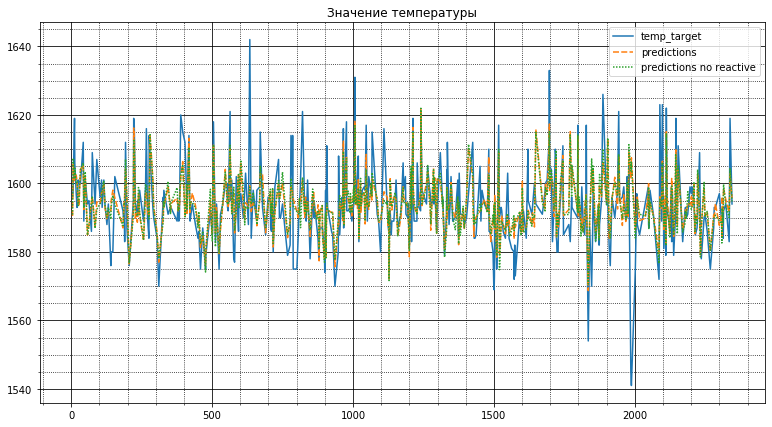

In [51]:
plotting = pd.DataFrame(data_target_test)
plotting['predictions'] = predictions
plotting['predictions no reactive'] = predictions_no_reactive

plt.figure(figsize = (13,7))

plt.minorticks_on()
plt.grid(which='major',
        color = 'k')
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')
cols_tb = ['a_power_start', 'r_power_start']
plt.title('Значение температуры')

sns.lineplot(data=plotting, palette="tab10", linewidth=1.5)

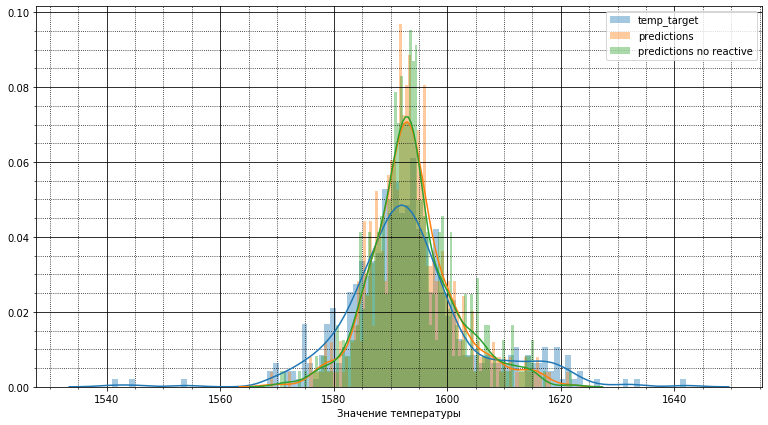

In [52]:
plt.figure(figsize = (13,7))

plt.minorticks_on()
plt.grid(which='major',
        color = 'k')
plt.grid(which='minor', 
        color = 'k', 
        linestyle = ':')

for cols in plotting.columns:
    sns.distplot(plotting[cols], kde=True, rug=False, label = cols, bins = 100,
                axlabel = 'Значение температуры')
    plt.legend()

#### Гистограмма важности факторов

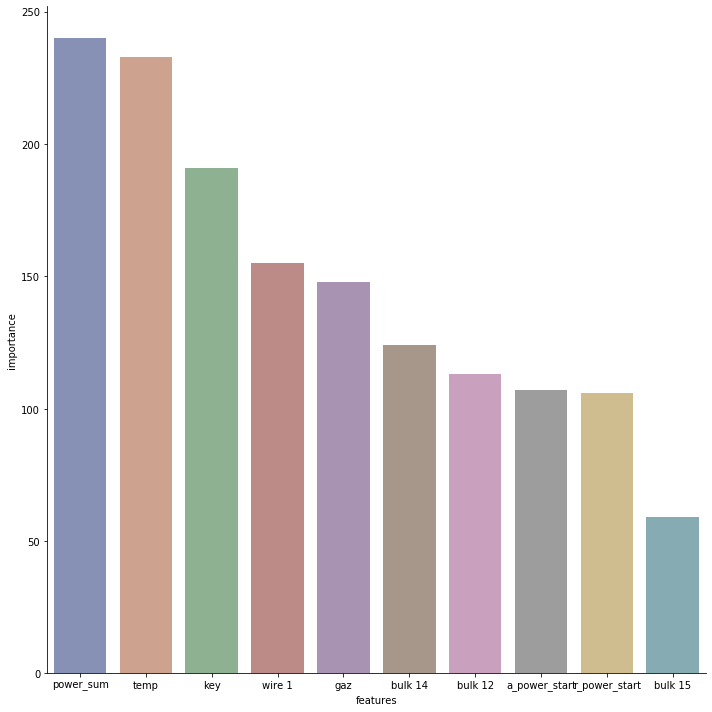

In [53]:
sns.catplot(
    data=feature_importances.sort_values(by = 'importance', ascending = False), kind="bar",
    x="features", y="importance", ci="sd", palette="dark", alpha=.5, height=10)

### Вывод

##### Была проведена обработка данных описывающих процесс закаливания стали на металлургическом комбинате, из исходных характеристик были взяты начальная температура работы, расходуемая и потребляемая мощности, объем газа, объем сыпучих материалов. Проведена предобработка данных, заполнены некоторые пропуски в данных, убраны ненужные параметры. Проведен исследовательский анализ данных. В качестве модели для построения выбрана модель LightGBM, согласно статьям решающая схожие задачи с высокой точностью. Параметры модели найдены с помощью перебора по сетке. Полученная метрика MAE = 6,28 удовлетворяет условию задачи. Для наглядной демострации результатов приведен сравнительный график, на котором видно, что модель хорошо справляется со значениями не сильно отличающихся от средних, но не очень точно прогнозирует значения, отличающиеся от средних. Для оценки необходимости доработки модели проведен также анализ целевого признака, видно, что распределение значений температуры нормальное и пик распределения соответствует приблизительно одному значению. Основное влияние на целевой признак оказывают суммарная мощность и начальная температура, а наименьшее - объем примесей, однако неиспользование этого фактора при возможном его наличие может привести к ухудшению работы модели, т.к. данные об объеме других примесей влияют более значительно. Это означает, что модель можно внедрить для уменьшения затрат на электроэнергию.